## Team 2: Spacial Inequality Dynamic 
##  Comparing US and UK
#### UK data found on the Database of Global Administrative Areas (GADM). UK is spilt into Nomencluature of territorial units for statistics (NUTS); a hierarchical systems for dividing up economic territory of the EU and the UK for purposes of: collection, development and EU region statistics as well as socio-economic analyses of the regions. Where NUTS 1 contains major socio-economic regions, NUTS 2 basic regions for the application of regional policies and NUTS 3 focuses on small regions for specific diagnosis. NUTS 1-3 are comparable to 1-US, 2-States and 3-cities. 

In [3]:
import geopandas as gpd

In [7]:
gdf2 = gpd.read_file('gadm36_GBR_2.shp')

(4, 11)

In [30]:
gdf2.shape

(183, 14)

## not good ...

<AxesSubplot:>

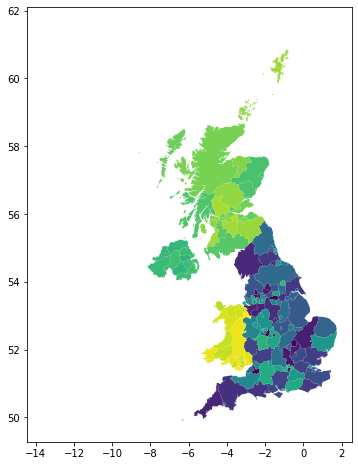

In [12]:
gdf2.plot(cmap='viridis', figsize=(8,8))

In [7]:
import geopandas as gpd
newgdf2 = gpd.read_file('NUTS_Level_2_(January_2018)_Boundaries.shp')
newgdf2.shape


(41, 10)

<AxesSubplot:>

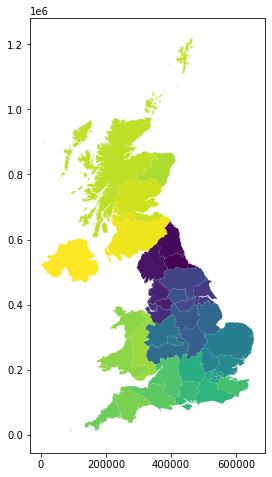

In [8]:
newgdf2.plot(cmap='viridis', figsize=(8,8))

In [9]:
newgdf2.head()

,objectid,nuts218cd,nuts218nm,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,UKC1,Tees Valley and Durham,414643,532242,-1.77440,54.685020,3.026249e+09,487438.014517,"MULTIPOLYGON (((416954.896 558226.798, 416959...."
1,2,UKC2,Northumberland and Tyne and Wear,398898,602530,-2.01892,55.316841,5.566181e+09,751311.485119,"MULTIPOLYGON (((398583.804 653093.703, 398566...."
2,3,UKD1,Cumbria,341868,527389,-2.90218,54.638260,6.822195e+09,987066.701024,"MULTIPOLYGON (((357067.497 586765.599, 357029...."
3,4,UKD3,Greater Manchester,377940,401102,-2.33407,53.506149,1.275981e+09,248705.119145,"POLYGON ((391363.101 420849.902, 391421.401 42..."
4,5,UKD4,Lancashire,363669,441026,-2.55392,53.864182,3.076413e+09,795004.920936,"MULTIPOLYGON (((370171.702 482434.604, 370185...."


In [10]:
newgdf2['nuts218nm'].nunique()

41

### Data to Use (Table 2= NUT 2 GHDI per head) 
### Data found on Office for National Statistics *Regional gross disposable household income:all NUTS level regions*

In [66]:
import pandas as pd
income= pd.read_excel(open('regionalgrossdisposablehouseholdincomeallnutslevelregions (2).xls','rb'), sheet_name= 'Table 2', header=[1])
income.head()


,NUTS level,NUTS code,Region name,1997,1998,1999,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,20181
0,UK,UK,United Kingdom,10799.0,11050.0,11551.0,12271.0,12679.0,13044.0,13383.0,...,16433.0,16603.0,16842.0,17486.0,18091.0,18651.0,19533.0,19719.0,20172.0,21109.0
1,Other,UK0,England,11058.0,11328.0,11850.0,12576.0,12985.0,13331.0,13663.0,...,16766.0,16923.0,17141.0,17822.0,18456.0,19043.0,20000.0,20207.0,20658.0,21609.0
2,NUTS1,UKC,North East,9295.0,9372.0,9726.0,10333.0,10736.0,10973.0,11267.0,...,13679.0,13921.0,14121.0,14710.0,14984.0,15347.0,15858.0,15971.0,16364.0,16995.0
3,NUTS2,UKC1,Tees Valley and Durham,9240.0,9234.0,9642.0,10222.0,10646.0,10851.0,11052.0,...,13366.0,13632.0,13827.0,14382.0,14602.0,15073.0,15519.0,15591.0,16020.0,16585.0
4,NUTS3,UKC11,Hartlepool and Stockton-on-Tees,9324.0,9255.0,9741.0,10229.0,10604.0,10972.0,11247.0,...,13768.0,14026.0,14392.0,14832.0,14893.0,15387.0,15745.0,15814.0,16465.0,17243.0


In [67]:
income.rename(columns={'Region name':'region'},inplace=True)

In [68]:
print(income.groupby('NUTS level').region.nunique())

NUTS level
1 Provisional.       0
NUTS1               12
NUTS2               41
NUTS3              179
Other                1
UK                   1
Name: region, dtype: int64


In [70]:
income.to_csv('uk2', index=False)

In [71]:
uk2=pd.read_csv('uk2')

In [72]:
uk2.head()

,NUTS level,NUTS code,region,1997,1998,1999,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,20181
0,UK,UK,United Kingdom,10799.0,11050.0,11551.0,12271.0,12679.0,13044.0,13383.0,...,16433.0,16603.0,16842.0,17486.0,18091.0,18651.0,19533.0,19719.0,20172.0,21109.0
1,Other,UK0,England,11058.0,11328.0,11850.0,12576.0,12985.0,13331.0,13663.0,...,16766.0,16923.0,17141.0,17822.0,18456.0,19043.0,20000.0,20207.0,20658.0,21609.0
2,NUTS1,UKC,North East,9295.0,9372.0,9726.0,10333.0,10736.0,10973.0,11267.0,...,13679.0,13921.0,14121.0,14710.0,14984.0,15347.0,15858.0,15971.0,16364.0,16995.0
3,NUTS2,UKC1,Tees Valley and Durham,9240.0,9234.0,9642.0,10222.0,10646.0,10851.0,11052.0,...,13366.0,13632.0,13827.0,14382.0,14602.0,15073.0,15519.0,15591.0,16020.0,16585.0
4,NUTS3,UKC11,Hartlepool and Stockton-on-Tees,9324.0,9255.0,9741.0,10229.0,10604.0,10972.0,11247.0,...,13768.0,14026.0,14392.0,14832.0,14893.0,15387.0,15745.0,15814.0,16465.0,17243.0


In [73]:
merge=pd.merge(uk2,newgdf2,left_on='NUTS code',right_on='nuts218cd')

In [74]:
merge.head()

,NUTS level,NUTS code,region,1997,1998,1999,2000,2001,2002,2003,...,objectid,nuts218cd,nuts218nm,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,NUTS2,UKC1,Tees Valley and Durham,9240.0,9234.0,9642.0,10222.0,10646.0,10851.0,11052.0,...,1,UKC1,Tees Valley and Durham,414643,532242,-1.77440,54.685020,3.026249e+09,487438.014517,"MULTIPOLYGON (((416954.896 558226.798, 416959...."
1,NUTS2,UKC2,Northumberland and Tyne and Wear,9339.0,9485.0,9795.0,10424.0,10810.0,11074.0,11444.0,...,2,UKC2,Northumberland and Tyne and Wear,398898,602530,-2.01892,55.316841,5.566181e+09,751311.485119,"MULTIPOLYGON (((398583.804 653093.703, 398566...."
2,NUTS2,UKD1,Cumbria,9992.0,10408.0,10725.0,11186.0,11906.0,12112.0,12651.0,...,3,UKD1,Cumbria,341868,527389,-2.90218,54.638260,6.822195e+09,987066.701024,"MULTIPOLYGON (((357067.497 586765.599, 357029...."
3,NUTS2,UKD3,Greater Manchester,9620.0,9765.0,10399.0,10979.0,11247.0,11556.0,11782.0,...,4,UKD3,Greater Manchester,377940,401102,-2.33407,53.506149,1.275981e+09,248705.119145,"POLYGON ((391363.101 420849.902, 391421.401 42..."
4,NUTS2,UKD4,Lancashire,9543.0,9682.0,10058.0,10693.0,11048.0,11308.0,11586.0,...,5,UKD4,Lancashire,363669,441026,-2.55392,53.864182,3.076413e+09,795004.920936,"MULTIPOLYGON (((370171.702 482434.604, 370185...."


In [75]:
merge['region'].nunique()

41

<AxesSubplot:>

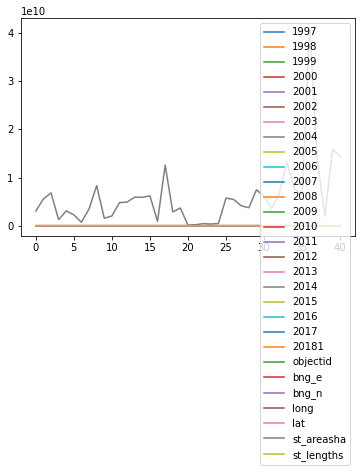

In [76]:
merge.plot()

In [77]:
type(merge)

pandas.core.frame.DataFrame

In [78]:
from geopandas import GeoDataFrame

In [79]:
merge2=GeoDataFrame(merge)

In [80]:
type(merge2)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

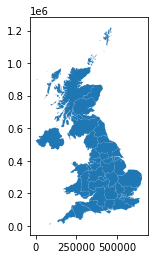

In [81]:
merge2.plot()

In [84]:
merge2['1997']

0      9240.0
1      9339.0
2      9992.0
3      9620.0
4      9543.0
5     11370.0
6      9350.0
7      9238.0
8     11379.0
9      8983.0
10     9665.0
11     9388.0
12    10395.0
13    10059.0
14    11207.0
15    10016.0
16     9160.0
17    10424.0
18    12437.0
19    11620.0
20    20600.0
21    10759.0
22    11304.0
23    12965.0
24    13183.0
25    13669.0
26    13991.0
27    11747.0
28    11580.0
29    11574.0
30    11353.0
31     9895.0
32    10576.0
33     9207.0
34     9845.0
35    11099.0
36     8921.0
37    10210.0
38     9398.0
39     9302.0
40     8717.0
Name: 1997, dtype: float64

<AxesSubplot:>

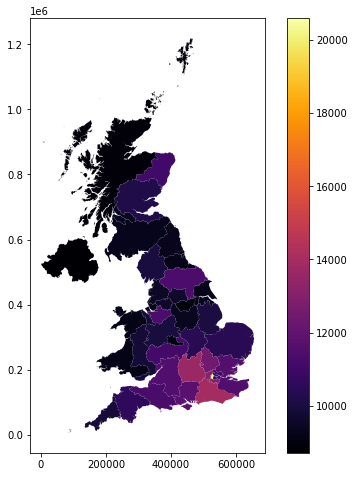

In [83]:
merge2.plot(column='1997',cmap='inferno', figsize=(8,8),legend=True)